<a href="https://colab.research.google.com/github/snehamahapatra/Cognifyz-Technologies-Project/blob/main/Level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cognifyz Technologies**
### **Data Science Internship Level-3**

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


In [ ]:
# Reading Dataset
data = pd.read_csv(r"Dataset .csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## **Task 1**
### **Predictive Modeling**
- Build a regression model to predict the aggregate rating of a restaurant based on available features.
- Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
- Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")

In [ ]:
data['Restaurant Name Length'] = data['Restaurant Name'].apply(len)
data['Address Length'] = data['Address'].apply(len)
data['Has Table Booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})
data['Has Online Delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [ ]:
X = data[['Average Cost for two', 'Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery']]
y = data['Aggregate rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
def evaluate_regression_model(model, X_test, y_test):
    """
    Evaluate a regression model's performance.

    Parameters:
    - model: The trained regression model to be evaluated.
    - X_test: The input features for testing.
    - y_test: The true target values for testing.

    Returns:
    - mse: Mean Squared Error (MSE) between predicted and true values.
    - r2: R-squared (R2) score indicating model's goodness of fit.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) score
    r2 = r2_score(y_test, y_pred)

    return mse, r2

In [ ]:
models = [
    ("Linear Regression", linear_reg),
    ("Decision Tree", decision_tree_reg),
    ("Random Forest", random_forest_reg)
]

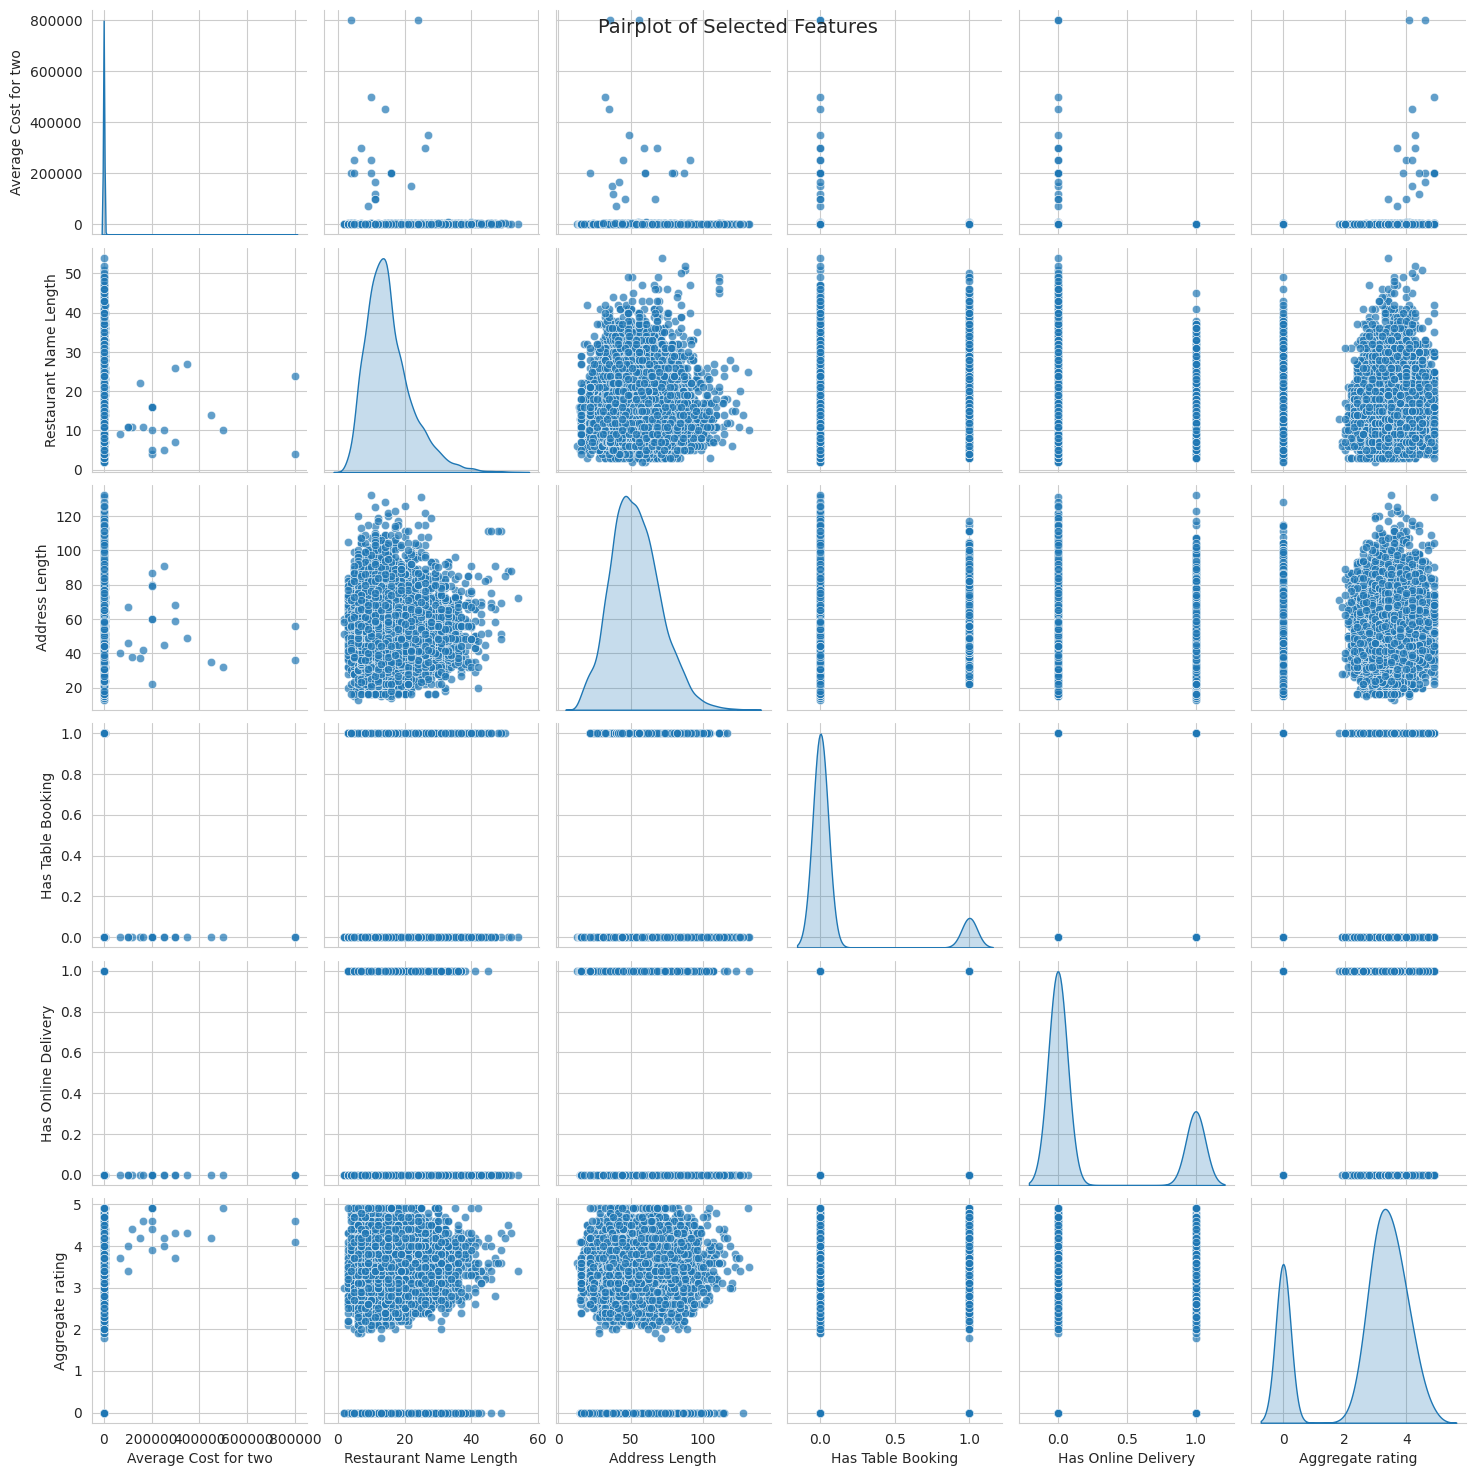

In [ ]:
# Assuming the correct column names are present in your DataFrame
selected_columns = [
    'Average Cost for two',
    'Restaurant Name Length',
    'Address Length',
    'Has Table Booking',
    'Has Online Delivery',
    'Aggregate rating'
]

# Select the columns of interest
selected_data = data[selected_columns]

# Set a pleasant style for the plot
sns.set_style("whitegrid")

# Create a pairplot with enhanced aesthetics
pairplot = sns.pairplot(selected_data, diag_kind='kde', plot_kws={'alpha': 0.7})

# Customize the title
pairplot.fig.suptitle('Pairplot of Selected Features', fontsize=14)

# Show the plot
plt.show()

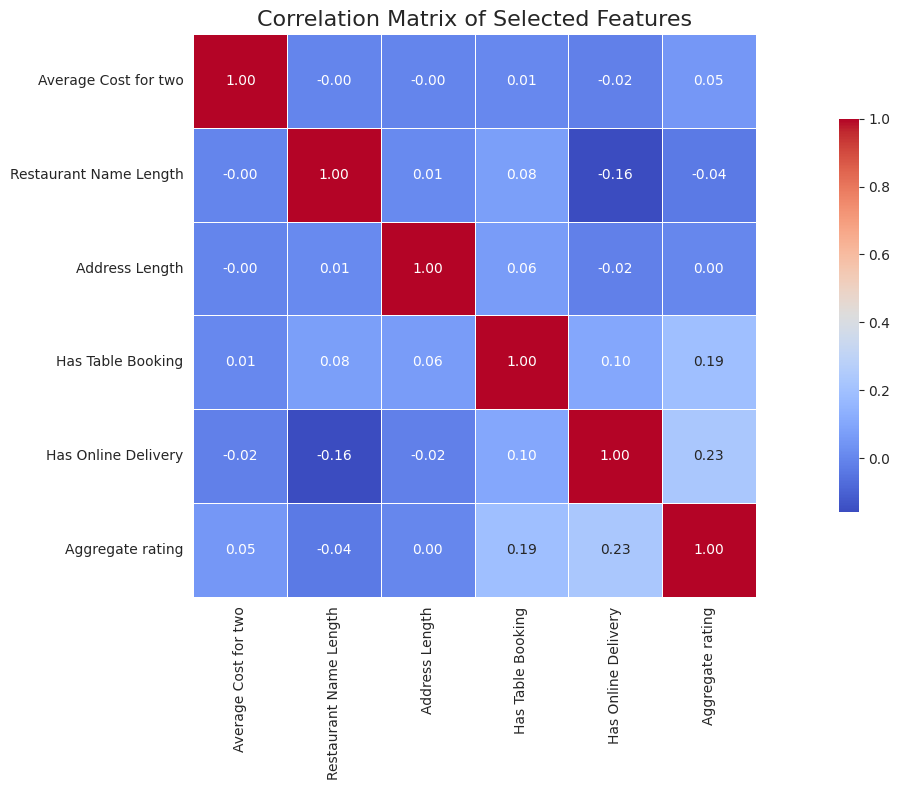

In [ ]:
# Assuming the correct column names are present in your DataFrame
selected_columns = [
    'Average Cost for two',
    'Restaurant Name Length',
    'Address Length',
    'Has Table Booking',
    'Has Online Delivery',
    'Aggregate rating'
]

# Calculate the correlation matrix for the selected columns
corr = data[selected_columns].corr()

# Set a pleasant style for the plot
sns.set_style("whitegrid")

# Create a correlation heatmap with enhanced aesthetics
plt.figure(figsize=(17, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True, cbar_kws={"shrink": 0.7})

# Customize the title
plt.title('Correlation Matrix of Selected Features', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


## **Task 2**
### **Customer Preference Analysis**
- Analyze the relationship between the type of cuisine and the restaurant's rating.
- Identify the most popular cuisines among customers based on the number of votes.
- Determine if there are any specific cuisines that tend to receive higher ratings.

In [ ]:
# Reading Dataset
data = pd.read_csv(r"Dataset .csv")

In [ ]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
cuisine_rating = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

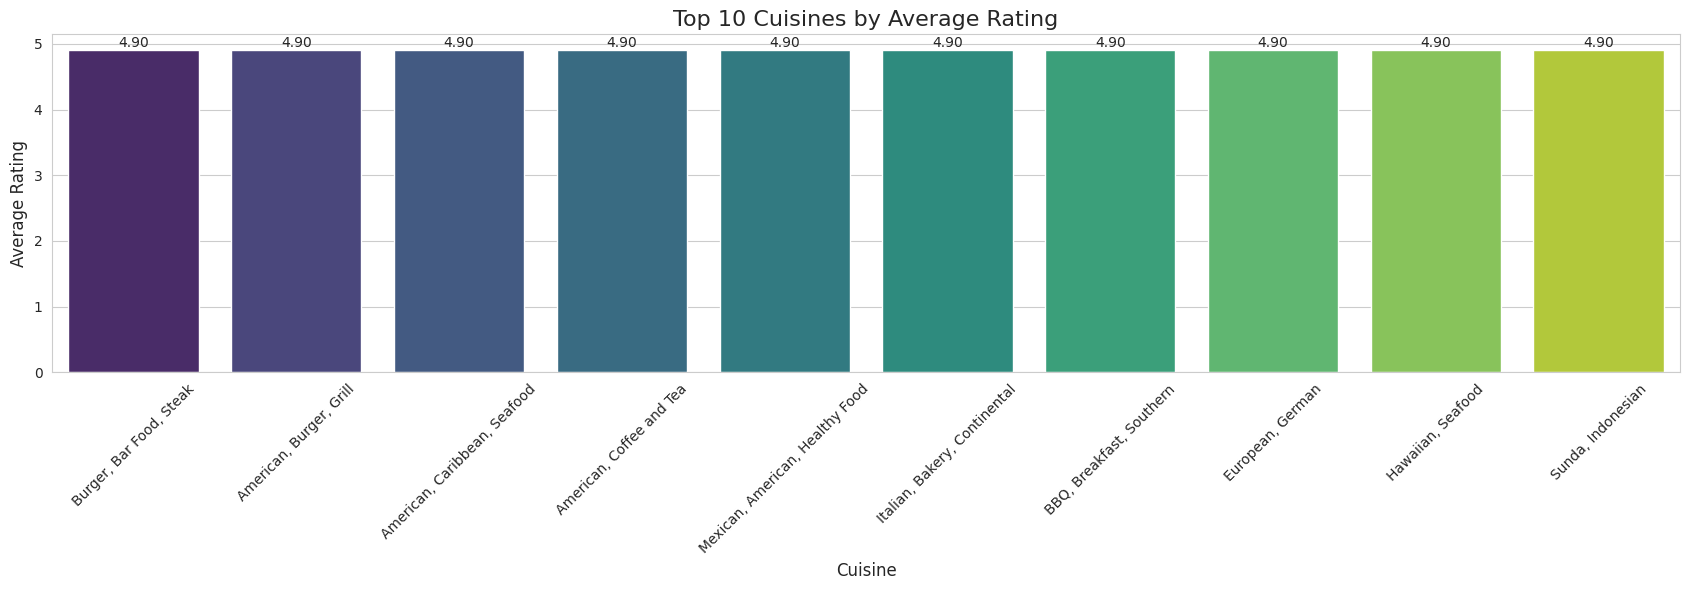

In [ ]:
# Sort the cuisine_rating DataFrame and select the top 10 cuisines
top_cuisines = cuisine_rating.head(10)

# Create a figure and axes with specified size
plt.figure(figsize=(17, 6))

# Create a bar plot
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')

# Add labels with values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Top 10 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
cuisine_votes = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

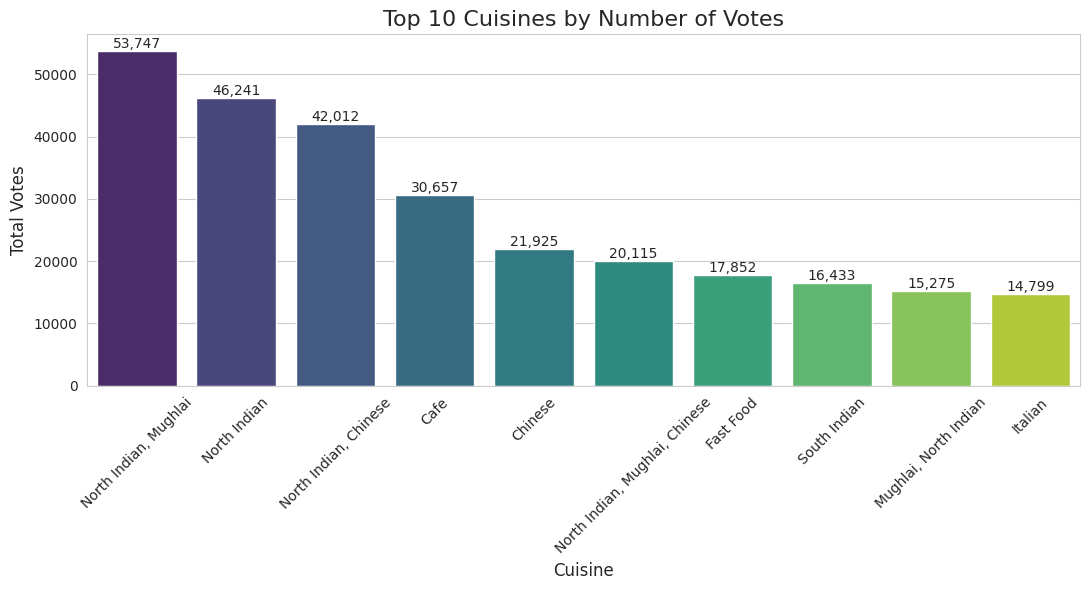

In [ ]:
# Sort the cuisine_votes DataFrame and select the top 10 cuisines
top_cuisines = cuisine_votes.head(10)

# Create a figure and axes with specified size
plt.figure(figsize=(11, 6))

# Create a bar plot
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')

# Add labels with values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Top 10 Cuisines by Number of Votes', fontsize=16)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
price_range_rating = data.groupby('Price range')['Aggregate rating'].mean()

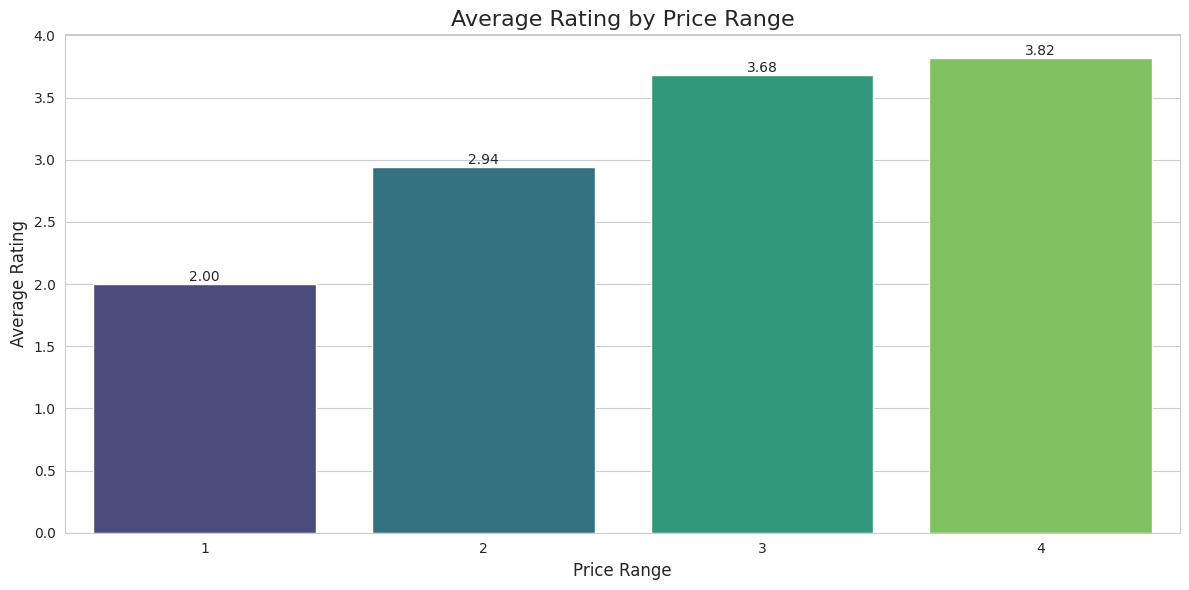

In [ ]:
# Sort the price_range_rating DataFrame by index
sorted_price_range_rating = price_range_rating.sort_index()

# Create a figure and axes with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = sns.barplot(x=sorted_price_range_rating.index, y=sorted_price_range_rating.values, palette='viridis')

# Add labels with values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Average Rating by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
table_booking_rating = data.groupby('Has Table booking')['Aggregate rating'].mean()

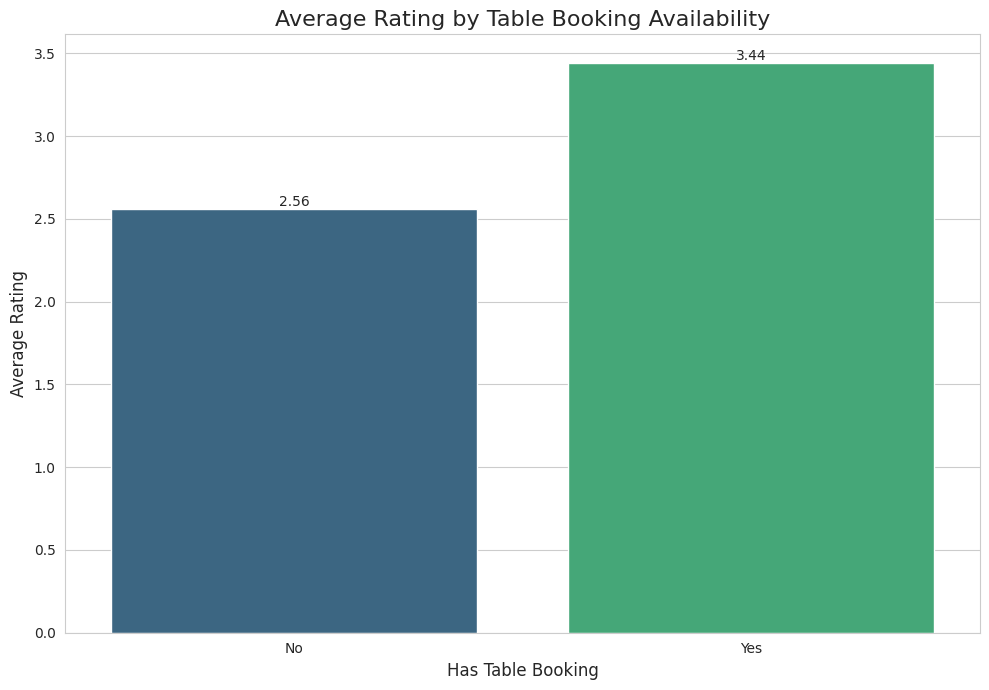

In [ ]:
# Sort the table_booking_rating DataFrame by index
sorted_table_booking_rating = table_booking_rating.sort_index()

# Create a figure and axes with specified size
plt.figure(figsize=(10, 7))

# Create a bar plot
ax = sns.barplot(x=sorted_table_booking_rating.index, y=sorted_table_booking_rating.values, palette='viridis')

# Add labels with values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Average Rating by Table Booking Availability', fontsize=16)
plt.xlabel('Has Table Booking', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

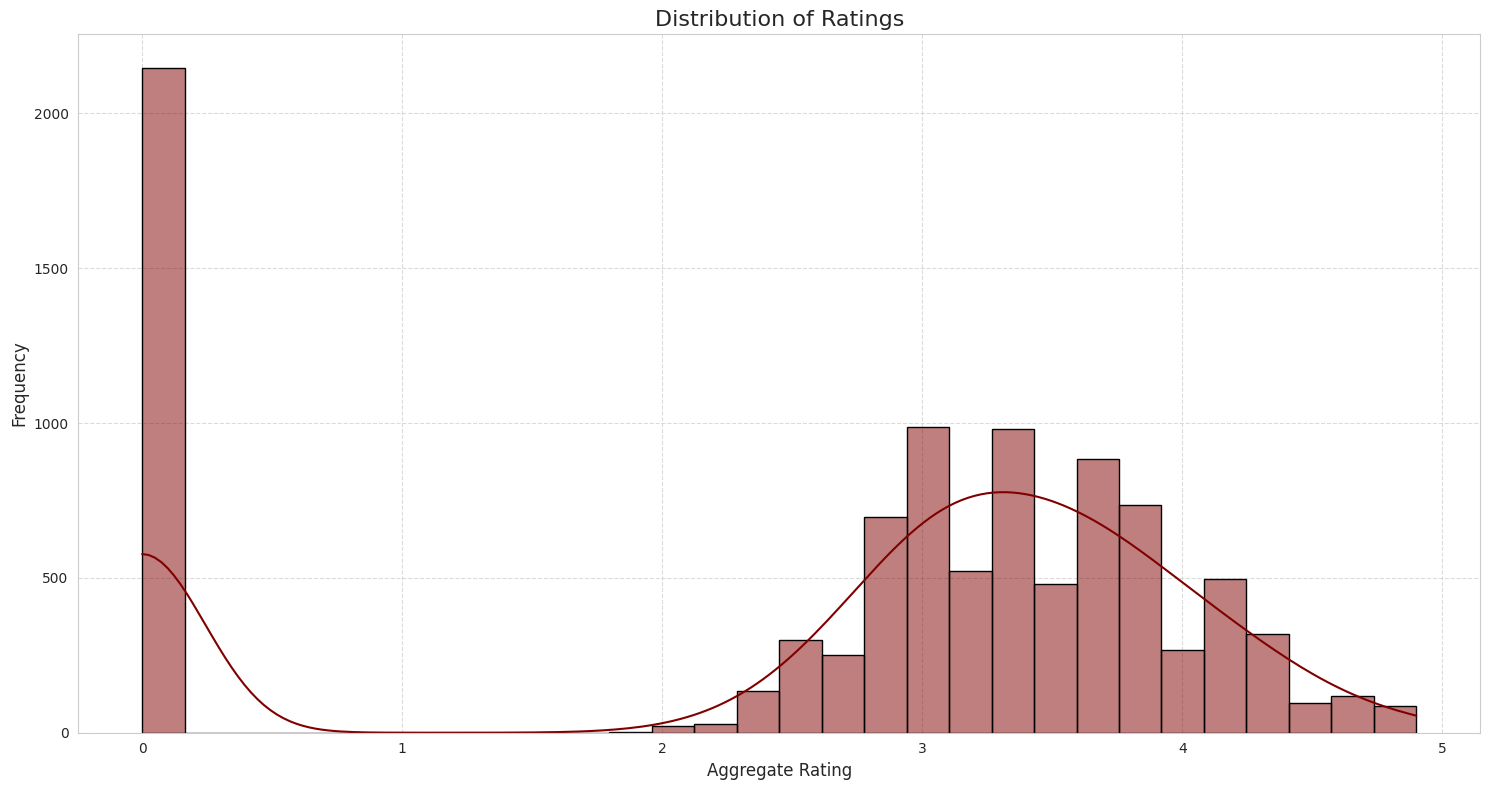

In [ ]:
# Create a figure and axes with specified size
plt.figure(figsize=(15, 8))

# Create a histogram plot with enhanced aesthetics
sns.histplot(data['Aggregate rating'], bins=30, kde=True, color='Maroon', edgecolor='black')

# Customize the plot labels
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add gridlines for reference
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

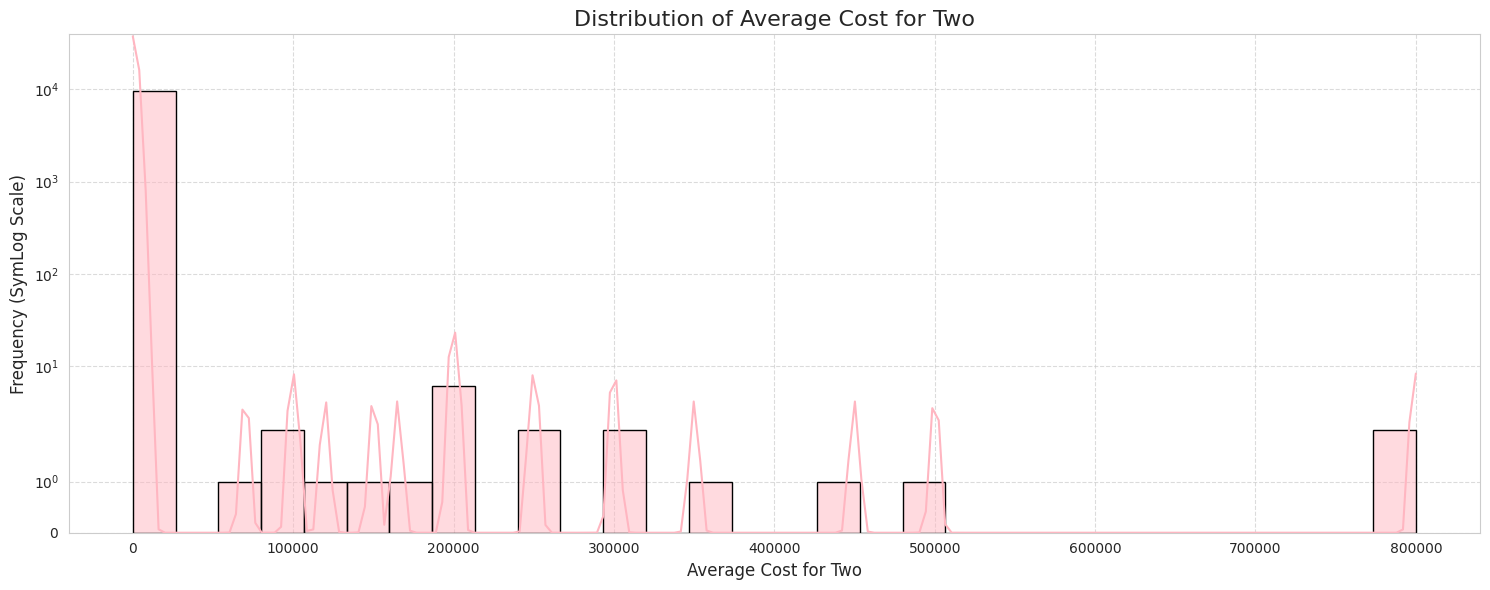

In [ ]:
# Create a figure and axes with specified size
plt.figure(figsize=(15, 6))

# Create a histogram plot with enhanced aesthetics and log scale on the y-axis
ax = sns.histplot(data['Average Cost for two'], bins=30, kde=True, color='lightPink', edgecolor='black')
ax.set_yscale('symlog')

# Customize the plot labels
plt.title('Distribution of Average Cost for Two', fontsize=16)
plt.xlabel('Average Cost for Two', fontsize=12)
plt.ylabel('Frequency (SymLog Scale)', fontsize=12)

# Add gridlines for reference
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## **Task 3**
### **Data Visualization**
- Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).
- Compare the average ratings of different cuisines or cities using appropriate visualizations.
- Visualize the relationship between various features and the target variable to gain insights.

In [ ]:
# Reading Dataset
data = pd.read_csv(r"Dataset .csv")

In [ ]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


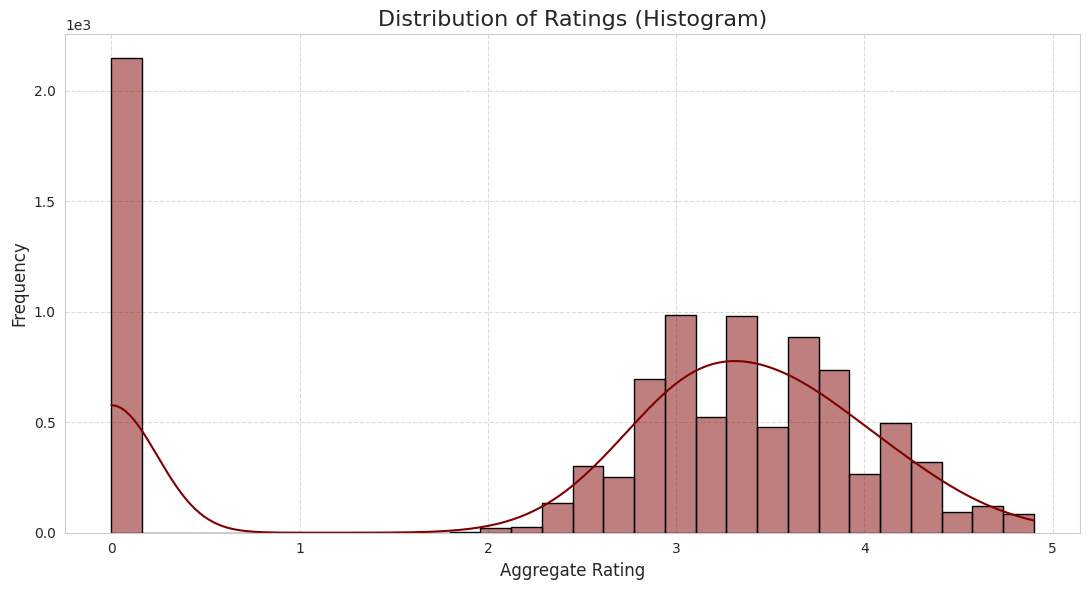

In [ ]:
# Create a figure and axes with specified size
plt.figure(figsize=(11, 6))

# Create a histogram plot with enhanced aesthetics
ax = sns.histplot(data['Aggregate rating'], bins=30, kde=True, color='Maroon', edgecolor='black')

# Customize the plot labels
plt.title('Distribution of Ratings (Histogram)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add gridlines for reference
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the y-axis ticks to use scientific notation
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Show the plot
plt.tight_layout()
plt.show()

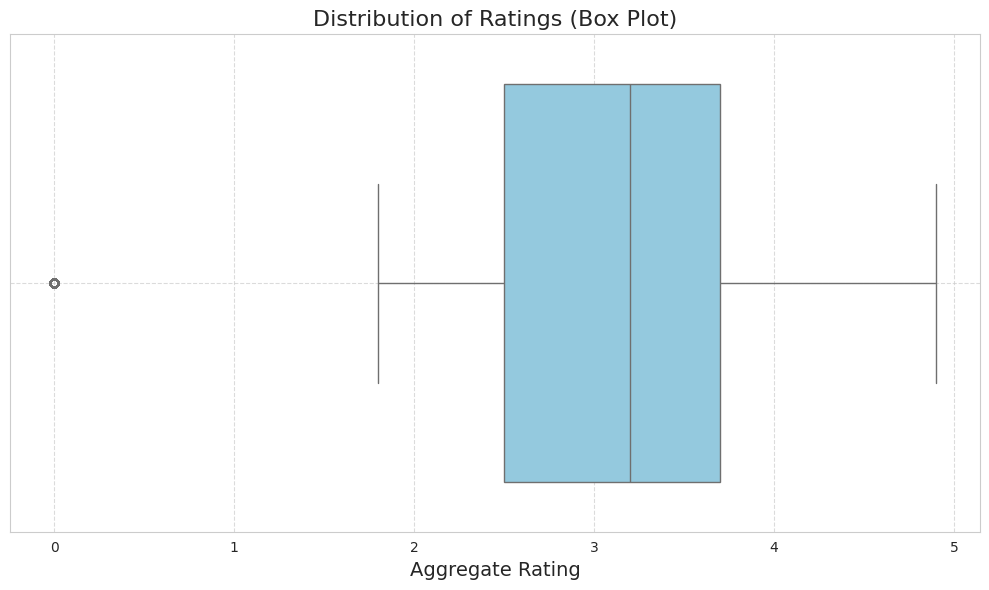

In [ ]:
# Create a figure and axes with specified size
plt.figure(figsize=(10, 6))

# Create a box plot with enhanced aesthetics
ax = sns.boxplot(x=data['Aggregate rating'], color='skyblue')

# Customize the plot labels
plt.title('Distribution of Ratings (Box Plot)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)

# Customize the y-axis ticks to use scientific notation
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

# Add gridlines for reference
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

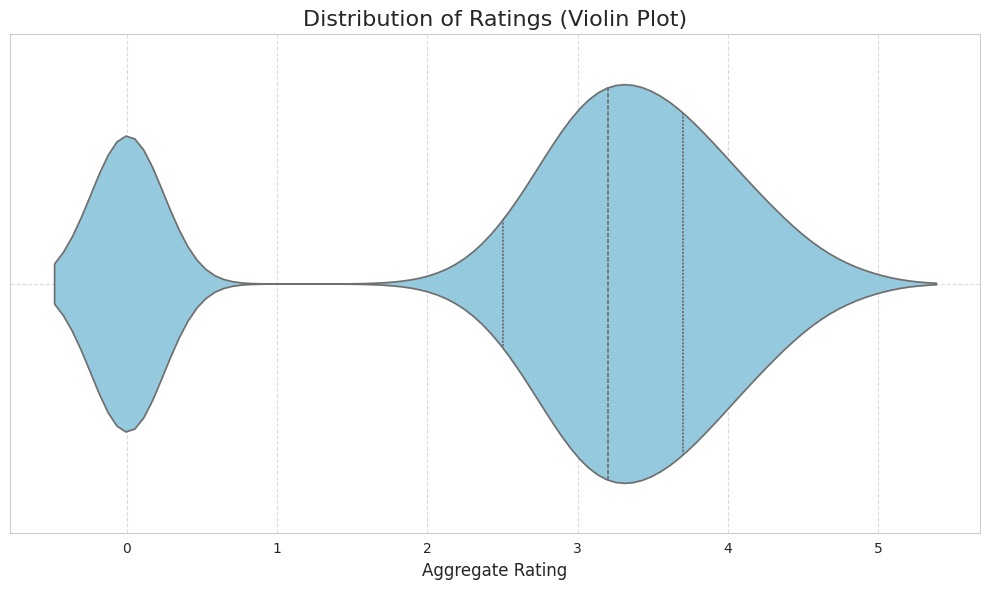

In [ ]:
# Create a figure and axes with specified size
plt.figure(figsize=(10, 6))

# Create a violin plot with enhanced aesthetics
ax = sns.violinplot(x=data['Aggregate rating'], color='skyblue', inner='quartiles')

# Customize the plot labels
plt.title('Distribution of Ratings (Violin Plot)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)

# Customize the y-axis ticks to use scientific notation
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

# Add gridlines for reference
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
online_delivery_count = data['Has Online delivery'].value_counts()

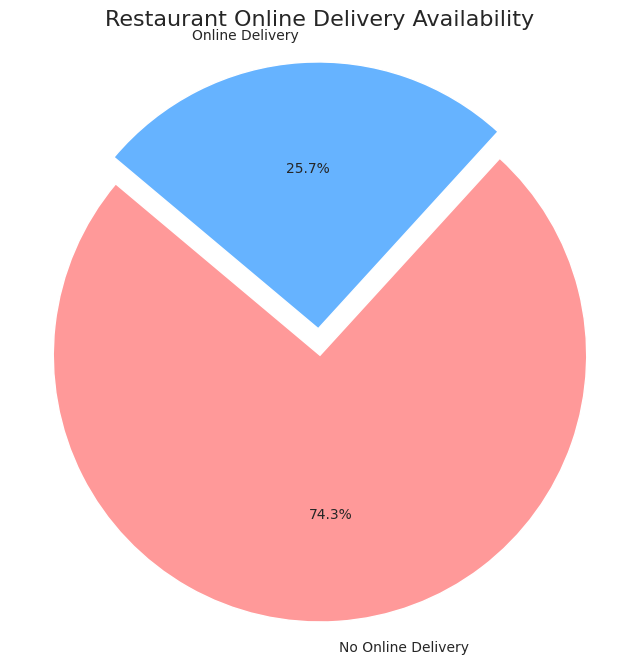

In [ ]:
# Data for the pie chart
labels = ['No Online Delivery', 'Online Delivery']
colors = ['#ff9999', '#66b3ff']  # Custom colors
explode = (0.1, 0)  # Explode the first slice (No Online Delivery)

# Create a figure with a specified size
plt.figure(figsize=(8, 8))

# Create a pie chart with enhanced aesthetics
plt.pie(online_delivery_count, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

# Customize the plot title
plt.title('Restaurant Online Delivery Availability', fontsize=16)

# Ensure an equal aspect ratio for a circular pie chart
plt.axis('equal')

# Show the plot
plt.show()

In [ ]:
table_booking_count = data['Has Table booking'].value_counts()

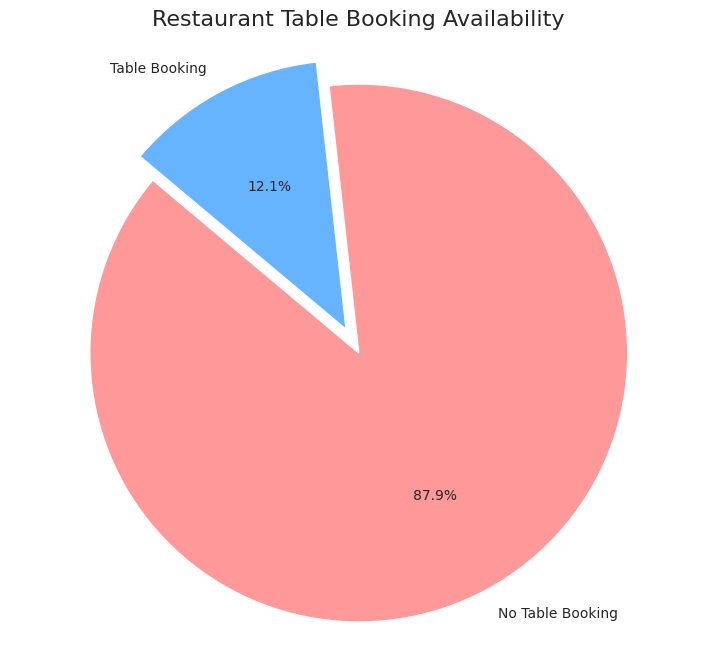

In [ ]:
# Data for the pie chart
labels = ['No Table Booking', 'Table Booking']
colors = ['#ff9999', '#66b3ff']  # Custom colors
explode = (0.1, 0)  # Explode the first slice (No Table Booking)

# Create a figure with a specified size
plt.figure(figsize=(9, 8))

# Create a pie chart with enhanced aesthetics and custom colors
plt.pie(table_booking_count, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

# Customize the plot title
plt.title('Restaurant Table Booking Availability', fontsize=16)

# Ensure an equal aspect ratio for a circular pie chart
plt.axis('equal')

# Show the plot
plt.show()